In [2]:
import sys
sys.path.append('env/lib/python38.zip')
sys.path.append('env/lib/python3.8')
sys.path.append('env/lib/python3.8/lib-dynload')
sys.path.append('env/lib/python3.8/site-packages')

In [3]:
import pandas as pd

In [4]:
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
import pylab
from pylab import *
import seaborn as sns
from matplotlib import rc

In [5]:
sns.set_style('ticks')
font = {
    'font.weight': 1000,
    'font.size': 15,
}
sns.set_style(font)
paper_rc = {
    'lines.linewidth': 2,
    'lines.markersize': 10,
}
sns.set_context("paper", font_scale=2,  rc=paper_rc)

In [6]:
def save_pdf(output_filename):
    if output_filename is not None:
        with PdfPages(output_filename) as pdf:
            pdf.savefig(bbox_inches='tight')

In [11]:
from process_data import process as process_karl_data

legend_filename_dict = {
    'True': 'LivestreamOn',
    'ClassSearch': 'search',
    'DiffPriv': 'diff_priv',
    'PersonDet': 'person_detection'
}

def parse_data(X):
    data = [[],[],[],[]]
    names = [legend_filename_dict[x] for x in X]
    print(names)
    for name in names:
        _, averages = process_karl_data(name)
        for i in range(len(averages)):
            data[i].append(averages[i])
    return data

In [8]:
# Plot and save the bar chart as a PDF
labels = ['Baseline', 'PubSub', 'ColdCache', 'WarmCache']
def plot_wide_graph(X, filename='optimizations_bm.pdf'):
    data = parse_data(X)

    sns.set_palette(sns.color_palette('rocket_r'))
    X_axis = np.arange(len(X))

    plt.bar(X_axis - 0.3, data[0], 0.2, label = labels[0])
    plt.bar(X_axis - 0.1, data[2], 0.2, label = labels[2])
    plt.bar(X_axis + 0.1, data[3], 0.2, label = labels[3])
    # plt.bar(X_axis + 0.3, data[3], 0.2, label = labels[3])

    plt.xticks(X_axis, X)
    plt.xlabel('Pipeline Policy')
    plt.ylabel('Latency (s)')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.32), ncol=2)
    save_pdf(filename)
    plt.show()

def plot_skinny_graph1(X, filename, plot_legend=False):
    data = parse_data(X)

    plt.figure(figsize=(3,4))
    sns.set_palette(sns.color_palette('rocket_r'))
    X_axis = np.arange(len(X))

    plt.bar(X_axis - 0.3, data[0], 0.2, label = labels[0])
    plt.bar(X_axis - 0.1, data[2], 0.2, label = labels[2])
    plt.bar(X_axis + 0.1, data[3], 0.2, label = labels[3])
    # plt.bar(X_axis + 0.3, data[3], 0.2, label = labels[3])

    if plot_legend:
        legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=3)
    plt.xticks(X_axis, X)
    plt.ylabel('Latency (s)')
    save_pdf(filename)
    plt.show()

def plot_skinny_graph(X, filename, label, ylim=None, plot_legend=False):
    data = parse_data(X)

    plt.figure(figsize=(3,3))
    sns.set_palette(sns.color_palette('rocket_r'))
    X_axis = np.arange(len(X))

    plt.bar(X_axis - 0.2, data[0], 0.2, label = labels[0])
    plt.bar(X_axis + 0.0, data[2], 0.2, label = labels[2])
    plt.bar(X_axis + 0.2, data[3], 0.2, label = labels[3])
    # plt.bar(X_axis + 0.3, data[3], 0.2, label = labels[3])

    if plot_legend:
        legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)
    plt.xticks(X_axis, [label])
    plt.ylabel('Latency (s)')
    if ylim is not None:
        plt.ylim(ylim)
    save_pdf(filename)
    plt.show()

# plot_wide_graph(['True', 'ClassSearch', 'PersonDet', 'DiffPriv'])
# plot_skinny_graph(['True', 'ClassSearch'], 'opt1.pdf')
# plot_skinny_graph(['PersonDet', 'DiffPriv'], 'opt2.pdf')
plot_skinny_graph(['True'], 'livestream_on.pdf', 'LivestreamOn', ylim=[0,.8])
plot_skinny_graph(['ClassSearch'], 'speech_light.pdf', 'SpeechLight', ylim=[0,.8])
plot_skinny_graph(['PersonDet'], 'person_det.pdf', 'PersonDet', ylim=[0,24])
plot_skinny_graph1(['True'], 'legend.pdf', plot_legend=True)


['true']


FileNotFoundError: [Errno 2] No such file or directory: 'data/true'

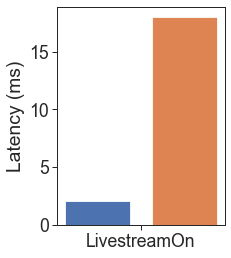

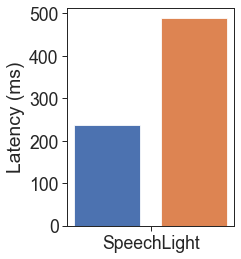

In [31]:
def plot_skinny_graph(i, X, label, units='s', ymax=None, plot_legend=False):
    plt.figure(figsize=(3,4))
    sns.set_palette(sns.color_palette('deep'))
    X_axis = np.arange(len([X]))

    plt.bar(X_axis - 0.1, X[0], 0.15, label = 'Local')
    plt.bar(X_axis + 0.1, X[1], 0.15, label = 'Cloud')

    if plot_legend:
        legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)
    plt.xticks(X_axis, [label])
    plt.ylabel('Latency ({})'.format(units))
    if ymax is not None:
        plt.ylim([0, ymax])
    save_pdf('local_vs_cloud_{}.pdf'.format(i))
    plt.show()

plot_skinny_graph(0, [2,18], 'LivestreamOn', units='ms', ymax=None)
plot_skinny_graph(1, [236,488], 'SpeechLight', units='ms', ymax=None)
plot_skinny_graph(2, [8.1,3.1], 'PersonDet', units='s', ymax=None)
plot_skinny_graph(3, [0,0], '', plot_legend=True)

In [8]:
# Plot and save the bar chart as a PDF
pipelines = ['True', 'ClassSearch', 'DiffPriv']
data = parse_data(pipelines)

sns.set_palette(sns.color_palette('Set1'.format(i+1)))
def plot_pipeline(i, yscale=1.0, unit='s', ymax=None):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    labels = ['Baseline', 'PubSub', 'ColdCache', 'WarmCache']
    latencies = [x[i] * yscale for x in data]
    ax.bar(labels, latencies)

    X_axis = np.arange(len(X))
    if ymax is not None:
        ax.set_ylim([0,ymax])

    plt.xlabel('Optimization')
    plt.ylabel('Latency ({})'.format(unit))
    save_pdf('{}.pdf'.format(pipelines[i]))
    plt.show()

plot_pipeline(0, ymax=1)
plot_pipeline(1, ymax=1)
plot_pipeline(2)

['true', 'search', 'diff_priv']


NameError: name 'i' is not defined

In [ ]:
# Plot and save the stacked bar chart as a PDF
df = pd.DataFrame({
    'Package': [0.2,0.1,.1],
    'Network': [0.3,0.1,.1],
    'Unpackage': [0.2,0.1,.1],
    'Execution': [0.3,0.7,.7],
})

sns.set_palette(sns.color_palette('colorblind'))
ax = df.plot.barh(stacked = True);
Y = ['DiffPriv', 'ClassBulb', 'ClassSearch']
Y_axis = np.arange(len(Y))
plt.xlim([0, 1])
plt.yticks(Y_axis, Y)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), ncol=2)
# plt.legend(loc='upper center', bbox_to_anchor=(1.25, 1.05), ncol=1)
save_pdf('latency_distribution.pdf')
plt.show()